In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches
from scipy import signal
import peakutils
import math

In [5]:
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'
EXPERIMENT_NAME = 'P3856'
# EXPERIMENT_DIR = '/media/big-ssd/experiments/{}'.format(EXPERIMENT_NAME)
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}'.format(EXPERIMENT_NAME)

In [6]:
d = pd.read_pickle('{}/precursor-cuboids-3did/exp-P3856-run-P3856_YHE211_1_Slot1-1_1_5104-precursor-cuboids-3did.pkl'.format(EXPERIMENT_DIR, EXPERIMENT_NAME, RUN_NAME))
cuboids_df = d['coords_df']
cuboids_df.reset_index(drop=True, inplace=True)

In [7]:
MS1_PEAK_DELTA = 0.1

In [8]:
len(cuboids_df)

4340

In [69]:
cuboids_df.sample(n=3)

,mz_lower,mz_upper,wide_mz_lower,wide_mz_upper,scan_lower,scan_upper,wide_scan_lower,wide_scan_upper,rt_lower,rt_upper,wide_rt_lower,wide_rt_upper,visualisation_d,precursor_cuboid_id
64,718.295994,719.889870,717.292639,719.889870,660,700,638,718,1620.275920,1625.038997,1620.275920,1625.038997,"{'voxel': {'voxel_mz_lower': 718.793986363747,...",64
3131,711.310616,712.427824,710.307261,712.427824,567,583,566,583,1625.038997,1628.743736,1625.038997,1628.743736,"{'voxel': {'voxel_mz_lower': 711.75881048435, ...",3131
418,702.778632,705.425289,701.775277,705.425289,630,670,618,698,1648.855888,1654.677750,1648.855888,1654.677750,{'voxel': {'voxel_mz_lower': 703.3165994290737...,418


In [84]:
cuboid_s = cuboids_df.loc[418]

In [85]:
mz_lower = cuboid_s.mz_lower
mz_upper = cuboid_s.mz_upper

wide_mz_lower = cuboid_s.wide_mz_lower
wide_mz_upper = cuboid_s.wide_mz_upper

scan_lower = cuboid_s.scan_lower
scan_upper = cuboid_s.scan_upper

wide_scan_lower = cuboid_s.wide_scan_lower
wide_scan_upper = cuboid_s.wide_scan_upper

rt_lower = cuboid_s.rt_lower
rt_upper = cuboid_s.rt_upper

In [86]:
visualisation_d = cuboid_s.visualisation_d

In [87]:
region_2d_df = pd.DataFrame(visualisation_d['region_2d_df'])
voxel_d = visualisation_d['voxel']

In [88]:
voxel_mz_lower = voxel_d['voxel_mz_lower']
voxel_mz_upper = voxel_d['voxel_mz_upper']

voxel_scan_lower = voxel_d['voxel_scan_lower']
voxel_scan_upper = voxel_d['voxel_scan_upper']

In [89]:
# create the colour map to convert intensity to colour
colour_map = cm.batlow_r
norm = colors.LogNorm(vmin=100, vmax=1000, clip=True)


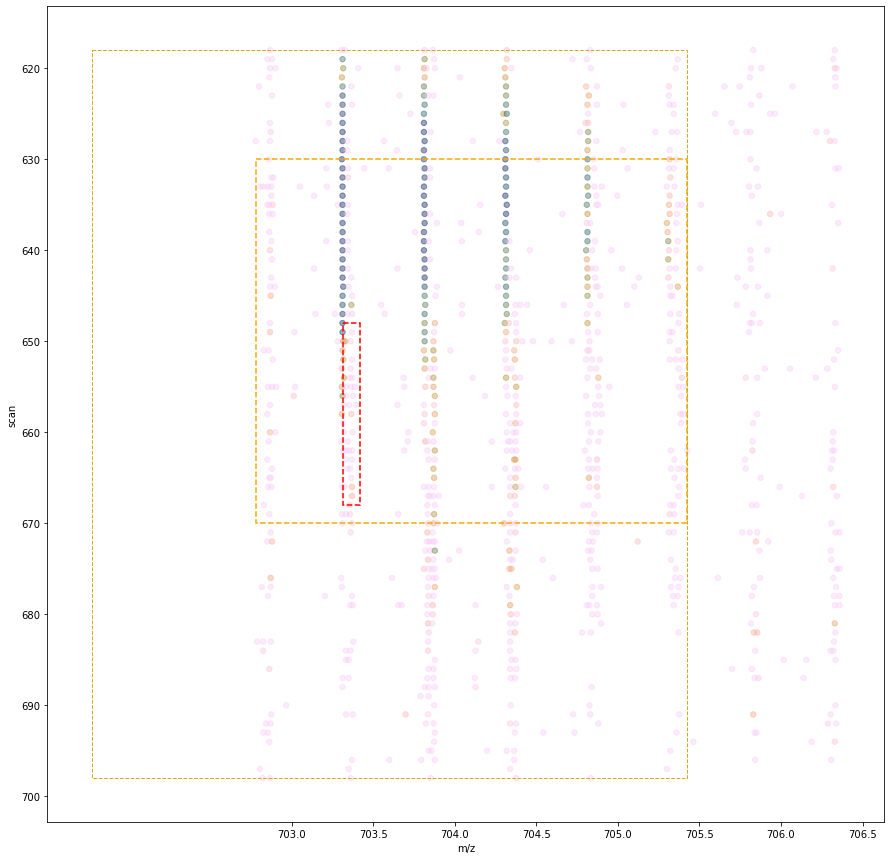

In [90]:
f, ax1 = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)

plt.scatter(region_2d_df.mz, region_2d_df.scan, c=region_2d_df.intensity, cmap=colour_map, norm=norm, alpha=0.4, s=30, linewidths=None, edgecolors=None)
# plt.plot(ap_mz, ap_scan, marker='x', markerfacecolor='none', markeredgecolor='red', linestyle='', markeredgewidth=5, ms=25, alpha=0.6, label='anchor point')

# draw the voxel
top_left = (voxel_mz_lower,voxel_scan_lower)
width = voxel_mz_upper - voxel_mz_lower
height = voxel_scan_upper - voxel_scan_lower
cuboid_rect = patches.Rectangle(top_left,width,height,linewidth=1.5,linestyle='--',edgecolor='red',facecolor='none')
ax1.add_patch(cuboid_rect)

# draw the cuboid extent
top_left = (mz_lower,scan_lower)
width = mz_upper - mz_lower
height = scan_upper - scan_lower
cuboid_rect = patches.Rectangle(top_left,width,height,linewidth=1.5,linestyle='--',edgecolor='orange',facecolor='none')
ax1.add_patch(cuboid_rect)

# draw the wide cuboid extent
top_left = (wide_mz_lower,wide_scan_lower)
width = wide_mz_upper - wide_mz_lower
height = wide_scan_upper - wide_scan_lower
cuboid_rect = patches.Rectangle(top_left,width,height,linewidth=1.0,linestyle='--',edgecolor='goldenrod',facecolor='none')
ax1.add_patch(cuboid_rect)

plt.xlabel("m/z")
plt.ylabel("scan")

nearest = 0.5
range_l = round(region_2d_df.mz.min() / nearest) * nearest
range_u = round(region_2d_df.mz.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

nearest = 10.0
range_l = round(region_2d_df.scan.min() / nearest) * nearest
range_u = round(region_2d_df.scan.max() / nearest) * nearest
plt.yticks(np.arange(range_l,range_u+nearest,nearest))

# plt.xlim([wide_mz_lower, wide_mz_upper])
# plt.ylim([wide_scan_lower, wide_scan_upper])

plt.gca().invert_yaxis()
plt.show()